# Jalin Roberts Exploratory Data Analysis portion of Final Project (DS-450-01)
## Web sources utilized in this analysis:
### https://pandas.pydata.org
### https://stackoverflow.com/questions/tagged/pandas
### https://www.w3schools.com/datascience/ds_analyze_data.asp
### https://seaborn.pydata.org/tutorial/function_overview.html

# Part 1: Analysis
### Loading relevant libraries and tools.
### Doing a quick df.head() and df.tail() just to confirm things loaded in correctly.

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Specifying file path/reading in the merged file.
file_path = '/Applications/Bellarmine DS Spring 2024/DS Senior Capstone/Final Project/merged_stocks.csv'
df = pd.read_csv(file_path)

#Display first five and last five rows.
print(df.head())
print(df.tail())

   Sym    Date        Open        High         Low       Close   Adj Close  \
0  SPY  1/2/18  267.839996  268.809998  267.399994  268.769989  243.072281   
1  SPY  1/3/18  268.959991  270.640015  268.959991  270.470001  244.609741   
2  SPY  1/4/18  271.200012  272.160004  270.540009  271.609985  245.640732   
3  SPY  1/5/18  272.510010  273.559998  271.950012  273.420013  247.277756   
4  SPY  1/8/18  273.309998  274.100006  272.980011  273.920013  247.729965   

     Volume  
0  86655700  
1  90070400  
2  80636400  
3  83524000  
4  57319200  
       Sym      Date        Open        High         Low       Close  \
15085  PWR  12/22/23  213.619995  214.160004  210.940002  214.039993   
15086  PWR  12/26/23  214.300003  215.479996  214.080002  214.660004   
15087  PWR  12/27/23  215.139999  216.029999  214.509995  215.949997   
15088  PWR  12/28/23  217.000000  217.250000  215.350006  216.470001   
15089  PWR  12/29/23  215.690002  216.869995  214.539993  215.800003   

        Adj Cl

In [265]:
#Checking data types.
print(df.dtypes)

Sym           object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


### Checking for missing values, because this data comes from yahoo finance, there will be none.

In [266]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: int64)


### There are three data types present in this data: nominal, interval, and ratio.
### Nominal data (such as the Stock Symbol) represents variables that don't have a quantitative value.
### Interval data (like dates) is kind of similar, however interval data matters in this context because the difference in date is important.
### Ratio data will be for the rest of our columns; Open, High, Low, Close/Adj Close, and Volume. 

### Note: This table is for ALL stock values, not the min-max of specific data like adjusted price.

In [267]:
value_range = []
for column in df.columns:
    #This is only for the date interval, doing nominal dtype does not return entire date range.
    if df[column].dtype == 'interval':
        #The range of values is just getting the min and max and adding a dash between.
        min_value = df[column].min()
        max_value = df[column].max()
        value_range.append(f"{min_value} - {max_value}")
    else:
        #For numerical data (interval or ratio), directly find the minimum and maximum value in the column and do the same.
        min_value = df[column].min()
        max_value = df[column].max()
        value_range.append(f"{min_value} - {max_value}")

#Making the results in a new DataFrame.
data_definitions = pd.DataFrame({
    'Name': df.columns,
    'Data Type': ['nominal', 'interval', 'ratio', 'ratio', 'ratio', 'ratio', 'ratio', 'ratio'],
    'Range of Values': value_range
})

#Display the assembled table
print(data_definitions)

        Name Data Type    Range of Values
0        Sym   nominal        CBSH - TSLA
1       Date  interval   1/10/18 - 9/9/22
2       Open     ratio  4.14 - 479.220001
3       High     ratio  4.43 - 479.980011
4        Low     ratio    3.9 - 476.26001
5      Close     ratio  4.13 - 477.709991
6  Adj Close     ratio  4.13 - 476.690002
7     Volume     ratio   1200 - 914082000


In [268]:
#Looking for average closing price.
average_prices = df.groupby('Sym')['Adj Close'].mean()
print("Average Adjusted Closing Prices | 2018-2023:")
print(average_prices)

Average Adjusted Closing Prices | 2018-2023:
Sym
CBSH     56.848522
CSTM     13.282863
IWM     169.071485
META    225.102942
MSFT    209.051196
PWR      86.528509
QQQ     264.619278
SPY     342.705646
SRE      56.902392
TSLA    145.981504
Name: Adj Close, dtype: float64


### The next thing I'm curious about is the percent change in adjusted closing price for 2018-2023.

In [269]:
percentage_change = (df.groupby('Sym')['Adj Close'].last() - df.groupby('Sym')['Adj Close'].first()) / df.groupby('Sym')['Adj Close'].first() * 100
print("% Change in Adjusted Closing Price | 2018-2023")
print(percentage_change)

% Change in Adjusted Closing Price | 2018-2023
Sym
CBSH      21.964637
CSTM      74.323135
IWM       40.996437
META      95.105278
MSFT     368.708310
PWR      459.284878
QQQ      169.292124
SPY       95.542658
SRE      105.335787
TSLA    1062.823981
Name: Adj Close, dtype: float64


### Because of how wild Telsa's stock price fluctuated over this time period, I'm curious to see exactly when this happened.
### I want to know this because there could be overall relevancy from a financial/economics standpoint that lead to a potential over-valuation.
### I can also look to the other stocks just out of curiosity.

In [270]:
#Making a loop that checks for max value for each unique value (Ticker in this case).
for stock in df['Sym'].unique():
    #Filter the data in stock name column ("Sym")
    stock_data = df[df['Sym'] == stock]
    #Find the row with the highest adjusted close price for the current stock.
    highest_adj_close = stock_data.loc[stock_data['Adj Close'].idxmax()]
    #Print the date and output.
    print(f"Stock: {stock}, Date: {highest_adj_close['Date']}, Highest Adjusted Close Price: ${highest_adj_close['Adj Close']}")


Stock: SPY, Date: 12/28/23, Highest Adjusted Close Price: $476.690002
Stock: QQQ, Date: 12/27/23, Highest Adjusted Close Price: $411.5
Stock: TSLA, Date: 11/4/21, Highest Adjusted Close Price: $409.970001
Stock: IWM, Date: 11/8/21, Highest Adjusted Close Price: $234.878174
Stock: MSFT, Date: 11/28/23, Highest Adjusted Close Price: $382.700012
Stock: SRE, Date: 9/12/22, Highest Adjusted Close Price: $81.243202
Stock: META, Date: 9/7/21, Highest Adjusted Close Price: $382.179993
Stock: CBSH, Date: 5/6/21, Highest Adjusted Close Price: $73.419411
Stock: CSTM, Date: 9/2/21, Highest Adjusted Close Price: $21.25
Stock: PWR, Date: 12/19/23, Highest Adjusted Close Price: $217.619492


### Half of the stocks saw their highest adjusted close price during the Covid-19 pandemic, I'm not entirely sure why. My theory is that people had more time to look into stocks and investing on apps like robinhood. Though, I am just speculating.
### This gives some insight into fluctiation, however I want to also look at MSFT (Microsoft) and META (Facebook) for 2020-2022. I'm choosing them because they are tech related and a lot of people spent a lot of time on technology owned by these companies during the pandemic.

In [271]:
#Using datetime to find the date range in question for Tesa/Microsoft during the pandemic.
df['Date'] = pd.to_datetime(df['Date'])
tesla_data_2020_2022 = df[(df['Sym'] == 'TSLA') & (df['Date'].dt.year.between(2020, 2022))]
tesla_fluctuation = tesla_data_2020_2022['Adj Close'].max() - tesla_data_2020_2022['Adj Close'].min()
msft_data_2020_2022 = df[(df['Sym'] == 'MSFT') & (df['Date'].dt.year.between(2020, 2022))]
msft_fluctuation = msft_data_2020_2022['Adj Close'].max() - msft_data_2020_2022['Adj Close'].min()

#Display max-min.
print ("Date Range: 2020-2022")
print ("Overall Change in Adjusted Closing Price (in $) for Tesla:", tesla_fluctuation)
print ("Overall Change in Adjusted Closing Price (in $) for Microsoft:", msft_fluctuation)

Date Range: 2020-2022
Overall Change in Adjusted Closing Price (in $) for Tesla: 385.88866800000005
Overall Change in Adjusted Closing Price (in $) for Microsoft: 206.0849


### Standard Deviation would probably work better for assesing potential volatility.

In [278]:
#Create df for returns and then get the percent change.
#Originally I was trying to get the output from the standard deviation/sqrt of 252 (number of trading days)
#Only need std dev for respective column (as percent change day-to-day)
df['Returns'] = df.groupby('Sym')['Adj Close'].pct_change()
sd_daily = df.groupby('Sym')['Returns'].std()
#Print overall volatility
print("Date Range: 2018-2023")
print(sd_daily*100)

Date Range: 2018-2023
Sym
CBSH    1.848128
CSTM    3.743258
IWM     1.604547
META    2.693981
MSFT    1.897623
PWR     2.147449
QQQ     1.575011
SPY     1.284364
SRE     1.696313
TSLA    4.016929
Name: Returns, dtype: float64


### There aren't a lot of data anomilies present in my data. However I'm particuarly interested in Tesla, Microsoft, and Meta. 
### Meta platforms have a LOT of potential for improvement long-term, especially for data science, machine learning, and AI.
### Microsoft is pretty much in the same boat, but is also valued at one of, if not the current largest company in the world by market cap.
### Tesla is arguably the leading innovator for electric vehicles, although Elon Musk's personal life has contributed to Tesla's wild price fluctiations over the years.

# Part 2: Visualizations

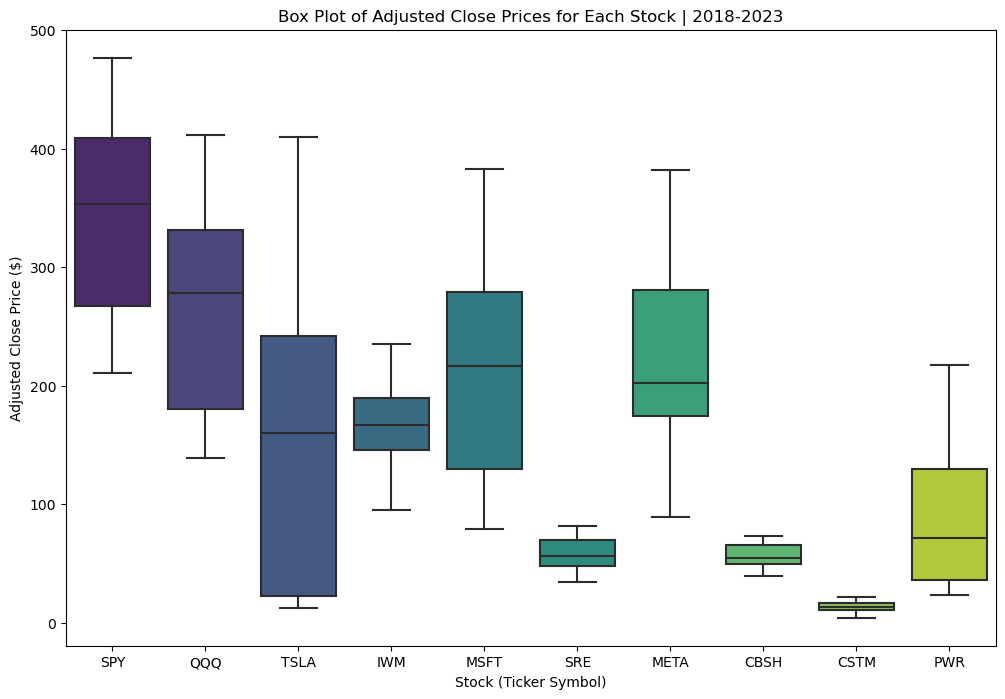

In [ ]:
#Setting the color palette, I personally like viridis.
palette = sns.color_palette("viridis", n_colors=df['Sym'].nunique())
#Creating a box plot, setting the size, and specifying axises from csv file.
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sym',
            y='Adj Close',
            data=df, palette=palette)

#Titles and Axis subtitles.
plt.title('Box Plot of Adjusted Close Prices for Each Stock | 2018-2023')
plt.xlabel('Stock (Ticker Symbol)')
plt.ylabel('Adjusted Close Price ($)')
plt.show()

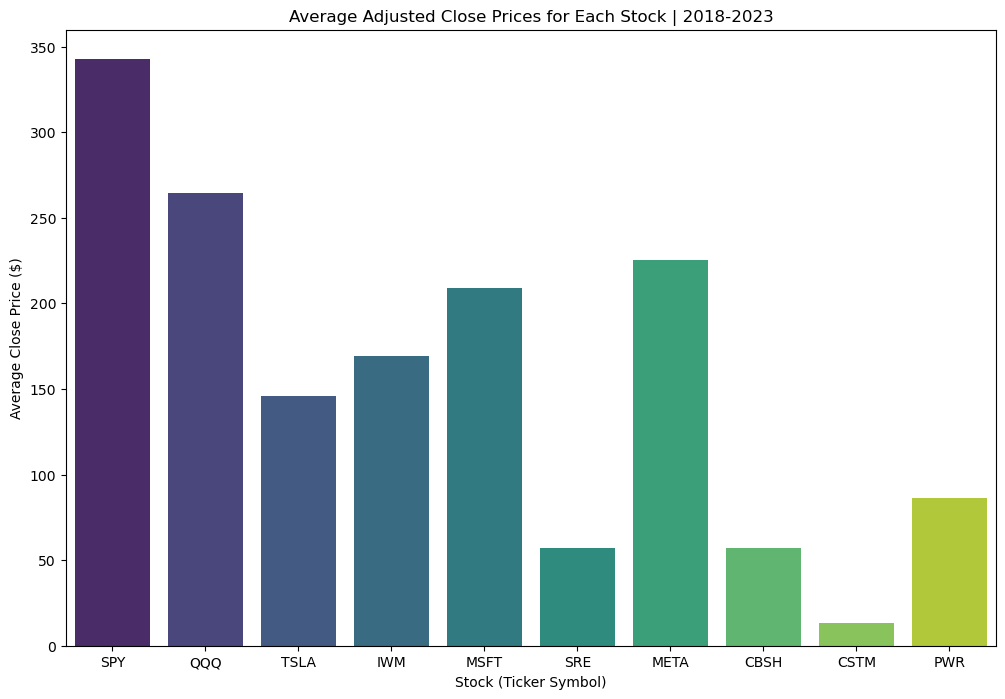

In [ ]:
#Data for barplot.
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Sym',
    y='Adj Close',
    data=df,
    estimator=np.mean,
    ci=None,
    palette="viridis"
)
#Labels and Title.
plt.title('Average Adjusted Close Prices for Each Stock | 2018-2023')
plt.xlabel('Stock (Ticker Symbol)')
plt.ylabel('Average Close Price ($)')
plt.show()

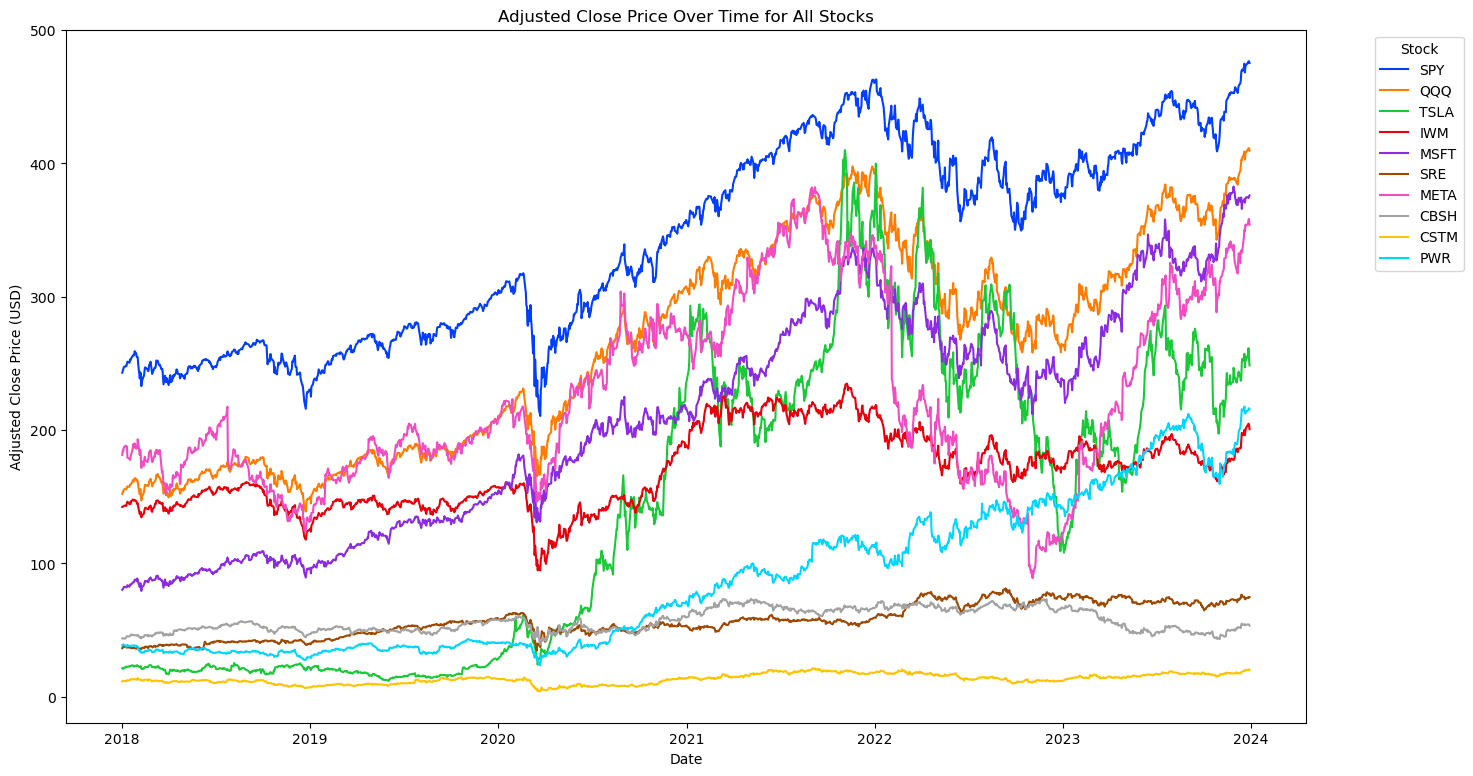

In [ ]:
#Data for lineplot.
plt.figure(figsize=(16, 9))
sns.lineplot(data=df, x='Date',
             y='Adj Close',
             hue='Sym', 
             palette='bright')
#Labes and Titles, added legend for legibility.
plt.title('Adjusted Close Price Over Time for All Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend(title='Stock',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.show()

### Just based on this graph, PWR (Quanta Services) shows to be the most consistent in terms of increase in adjusted closing price overall. Whereas CSTM has remained almost the same price for years without much fluxuation.

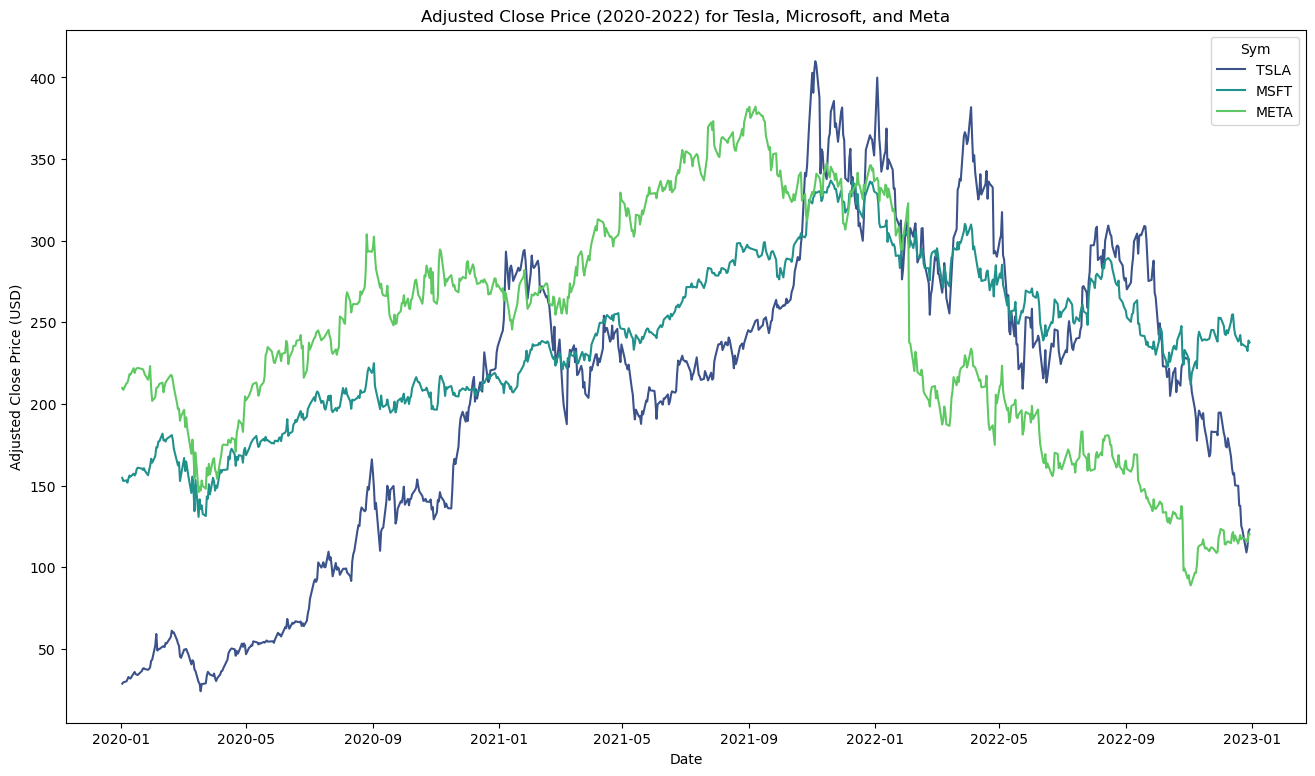

In [ ]:
#Getting the Symbol list to work correctly was extremely time consuming and resulted in TONS of errors.
#Plotting this date range for specific stocks was a lot more difficult to do than anticipated.
covid_data = df[(df['Date'].dt.year.between(2020, 2022)) & (df['Sym'].isin(['TSLA', 'MSFT', 'META']))]
plt.figure(figsize=(16, 9))
sns.lineplot(data=filtered_data,
             x='Date',
             y='Adj Close',
             hue='Sym',
             palette='viridis',
             style='Sym',
             dashes=False)
plt.title('Adjusted Close Price (2020-2022) for Tesla, Microsoft, and Meta')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.show()

# Closing thoughts

### Of the stocks I've observed in the visualization plots, PWR (Quanta Services) has had the most consistent upward trend of closing price. And this seems to have started around 2020, and continued a consistent improvement since then. The overall volatility of this stock seems fairly low, and increases in price may have been a result of more people being at home during lockdowns.
### The big three stocks, Tesla, Microsoft and Meta, are going to be more difficult to accurately predict due to the amount of fluxuation in price. There are a lot of factors within these companies that contribute to this. 
### Having some stocks that are more subject to volatility balances out the more conservative stocks that don't see much price fluxuation. I think this balance will help in the overall predictive analysis portion and model training.